In [1]:
import yaml
from src.mdc import CSV_OB, MDC_csv
from src.omc import Order
from src.backtest import Backtest
from pathlib import Path
from src.strategy import BaseStrat
from matplotlib import pyplot as plt
from src.strats.jonrev import JonRev
import datetime as dt

with open("./configs/test.yml", 'r') as f:
    a = yaml.safe_load(f)
# db = CSV_OB(Path("/Users/ugrek/Desktop/PairTrade/Binance_BTCUSD_11_01.csv"), a['Dataset'])
strat = [
    # JonRev(clear_every_step=1021600, active_step=5,  num_pairs=6, w_size=1800,  recal_steps=30, spread=0.005, z=1.4, cooldown_ms=1200_000, order_due_ms=3600_000, trade_amnt=1000),
    # JonRev(clear_every_step=1021600, active_step=5,  num_pairs=6, w_size=1800,  recal_steps=30, spread=0.005, z=1.8, cooldown_ms=1200_000, order_due_ms=3600_000, trade_amnt=1000),
    # JonRev(clear_every_step=1021600, active_step=5,  num_pairs=6, w_size=3600,  recal_steps=30, spread=0.005, z=1.4, cooldown_ms=1200_000, order_due_ms=3600_000, trade_amnt=1000),
    JonRev(max_trend_allowed=-1, clear_every_step=1021600, active_step=12,  num_pairs=12, w_size=600,  recal_steps=5, spread=0.006, z=2.0, cooldown_ms=60_000, order_due_ms=10800_000, trade_amnt=1000),
    JonRev(max_trend_allowed=-1, clear_every_step=1021600, active_step=12,  num_pairs=12, w_size=600,  recal_steps=5, spread=0.004, z=2.0, cooldown_ms=60_000, order_due_ms=10800_000, trade_amnt=1000),
    JonRev(max_trend_allowed=-1, clear_every_step=1021600, active_step=12,  num_pairs=12, w_size=1200, recal_steps=5, spread=0.006, z=2.0, cooldown_ms=60_000, order_due_ms=10800_000, trade_amnt=1000),
    JonRev(max_trend_allowed=-1, clear_every_step=1021600, active_step=12,  num_pairs=12, w_size=1200, recal_steps=5, spread=0.004, z=2.0, cooldown_ms=60_000, order_due_ms=10800_000, trade_amnt=1000),
]
backtest = Backtest("./configs/test.yml", "./data_3_fin/", strat, "pair_trade")
sharpe = [[] for n in backtest.strat_stats]

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: romanvetrin (edelweiss). Use `wandb login --relogin` to force relogin


In [2]:
i = 0
while (backtest.step()):
    if i % 10000 == 0:
        print(i)
    i += 1
backtest.run.finish()

0
10000
Clearing 3 BNBUSD_PERP -5.131395750669186
Clearing 3 OPUSD_PERP -809.4295939027265
Clearing 3 LINKUSD_PERP -36.145448809482446
Clearing 3 DOTUSD_PERP -67.53106606403826
Clearing 3 ETHUSDT -0.2001336830460972
Clearing 3 ADAUSD_PERP -3077.0897456318776
Clearing 3 AVAXUSD_PERP -14.326646938088013
Clearing 2 BNBUSD_PERP -5.131395750669183
Clearing 2 OPUSD_PERP -809.4295939027265
Clearing 2 LINKUSD_PERP -36.145448809482446
Clearing 2 DOTUSD_PERP -67.53106606403826
Clearing 2 ETHUSDT -0.2001336830460972
Clearing 2 ADAUSD_PERP -3725.089745631878
Clearing 2 AVAXUSD_PERP -14.326646938088013
20000
Clearing 2 LINKUSD_PERP 70.21978707099976
Clearing 3 LINKUSD_PERP 70.21978707099976
30000
Clearing 2 OPUSD_PERP -1052.708951000512
Clearing 2 ETHUSDT -0.7890218090525347
Clearing 3 BNBUSD_PERP -1.6748735538958424
Clearing 3 OPUSD_PERP -1052.7089510005133
Clearing 3 DOTUSD_PERP -197.73266633121827
Clearing 3 ETHUSDT -0.7890218090525352
40000
Clearing 1 LINKUSD_PERP -142.47374601227745
Clearing 1

Commissions:  2338.631243150877
Return:  0.002993680791529015
Net asset at the end:  683.0170323848297
Time passed, hours:  188


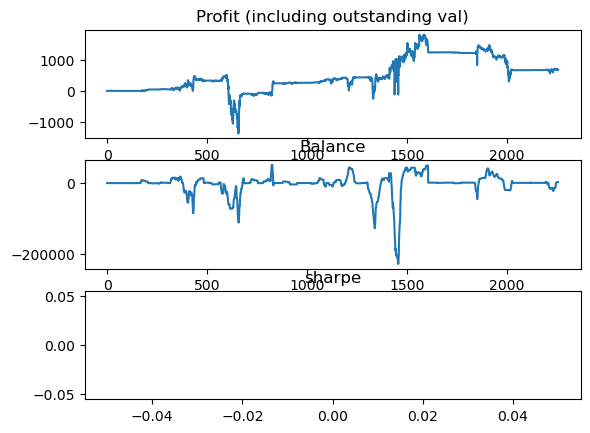

In [3]:
import datetime as dt
s = 0
eval = backtest.strat_stats[s].eval() 
print("Commissions: ", backtest.strat_stats[s].comm)
print("Return: ", eval.Return)
print("Net asset at the end: ", eval.PnL)
print("Time passed, hours: ", (eval.ts[-1] - eval.ts[0]) // 3600_000_000_000)

fig, ax = plt.subplots(3)

ax[0].plot(backtest.strat_stats[s].profit)
ax[0].set_title("Profit (including outstanding val)")
ax[1].plot(backtest.strat_stats[s].base)
ax[1].set_title("Balance")
ax[2].plot(sharpe[s])
ax[2].set_title("sharpe")

plt.show()

In [8]:
from src.omc import ExecStatus
s = 2
a = [n for n in backtest.strats[s].done_deals if n.enter_status == ExecStatus.FILLED and
                                                n.exit_status == ExecStatus.FILLED]
print(len(a), len(backtest.strats[s].done_deals))
b = [n for n in backtest.strats[s].done_deals if n.enter_status == ExecStatus.FILLED and
                                                n.exit_status == ExecStatus.EXPIRED]
print(len(b), len(backtest.strats[s].done_deals))

c = [n for n in backtest.strats[s].done_deals if n.enter_status == ExecStatus.EXPIRED and
               n.exit_status == ExecStatus.CANCELED]
print(len(c), len(backtest.strats[s].done_deals))
b

1539 3392
1535 3392
311 3392


[Deal(id_enter=264752638414634127894829877378572039078, id_exit=36032034835470241441434252111452058764, instr='', ts=1705162441866000000, enter_status=<ExecStatus.FILLED: 0>, exit_status=<ExecStatus.EXPIRED: 2>, closed_ts=1705173246866000000, curr_qt=0.0),
 Deal(id_enter=183035358394417568362694234545001965377, id_exit=267356096604505507661944087173154673141, instr='ETHUSDT', ts=1705162441866000000, enter_status=<ExecStatus.FILLED: 0>, exit_status=<ExecStatus.EXPIRED: 2>, closed_ts=1705173246866000000, curr_qt=0.0),
 Deal(id_enter=43227076007918452075779105253791833169, id_exit=288720124768143213357152453933142841931, instr='', ts=1705174021866000000, enter_status=<ExecStatus.FILLED: 0>, exit_status=<ExecStatus.EXPIRED: 2>, closed_ts=1705184826866000000, curr_qt=0.0),
 Deal(id_enter=94208784770263983649080647853035271931, id_exit=248365984223786445701952414521886937581, instr='ETHUSDT', ts=1705174021866000000, enter_status=<ExecStatus.FILLED: 0>, exit_status=<ExecStatus.EXPIRED: 2>, cl

15.319 15.211767242431641 1.0070493454179255 45.666666666666664


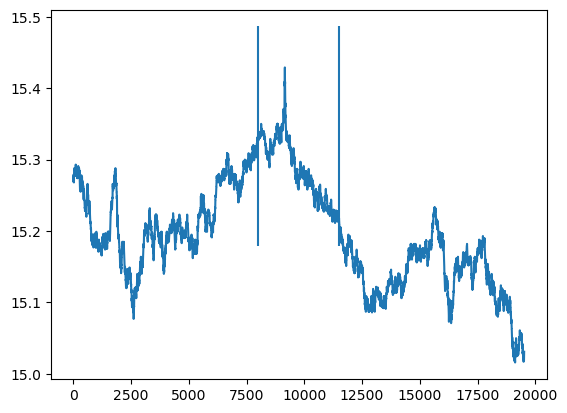

In [7]:
sample = a[50]
in_ord = [n for n in backtest.strat_stats[s].matchRes if n.order.id == sample.id_enter][0]
ex_ord = [n for n in backtest.strat_stats[s].matchRes if n.order.id == sample.id_exit][0]
print(in_ord.order.px, ex_ord.order.px, in_ord.order.px / ex_ord.order.px, (ex_ord.ts - in_ord.ts) / 60_000_000_000)
ds = backtest.mdc.dfs[backtest.mdc.names[in_ord.order.name]].df
ts = ds.o_ts_exch.loc[ds.o_ts_exch < in_ord.ts].shape[0]
ts_end = ds.o_ts_exch.loc[ds.o_ts_exch < sample.closed_ts].shape[0]
look_back = 8000
look_fwd = 8000
plt.plot(ds.iloc[ts-look_back:ts_end+look_fwd]["o_ask_px_1"].values)
plt.vlines(look_back, ds.iloc[ts].o_ask_px_1 * 1.01, ds.iloc[ts].o_ask_px_1 * 0.99)
plt.vlines(look_back + ts_end - ts, ds.iloc[ts].o_ask_px_1 * 1.01, ds.iloc[ts].o_ask_px_1 * 0.99)

In [14]:
s = 3
instr = {}

for deal in backtest.strats[s].done_deals:
    if deal.instr not in instr.keys():
        instr[deal.instr] = [0, 0, 0]
    instr[deal.instr][1] += 1
    if deal.enter_status == ExecStatus.FILLED and deal.exit_status == ExecStatus.FILLED:
        instr[deal.instr][0] += 1
    
    instr[deal.instr][2] = instr[deal.instr][0] / instr[deal.instr][1]

instr

{'ETHUSDT': [369, 682, 0.5410557184750733],
 '': [478, 800, 0.5975],
 'LINKUSD_PERP': [166, 333, 0.4984984984984985],
 'DOTUSD_PERP': [263, 382, 0.6884816753926701],
 'BTCUSDT': [410, 727, 0.5639614855570839],
 'OPUSD_PERP': [407, 656, 0.6204268292682927],
 'FILUSD_PERP': [224, 320, 0.7]}

(array([89., 59., 90., 44., 26., 23., 25., 46., 40., 39.]),
 array([  105. ,  1174.5,  2244. ,  3313.5,  4383. ,  5452.5,  6522. ,
         7591.5,  8661. ,  9730.5, 10800. ]),
 <BarContainer object of 10 artists>)

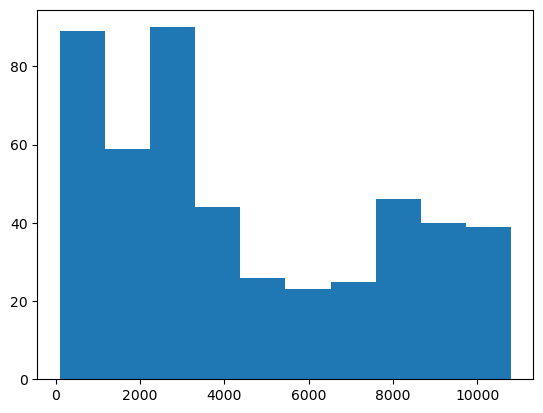

In [12]:
import numpy as np
plt.hist(np.array([n.closed_ts - n.ts for n in a]) / 1_000_000_000)

In [8]:
backtest.strats[0].closing_ids

[]

In [42]:
backtest.strat_stats[2].matchRes[2268:2280]
[n for n in backtest.strats[2].done_deals if n.id_enter == 60135998781967854275594868799989869587]

[Deal(id_enter=60135998781967854275594868799989869587, id_exit=216774430434634074390126252889921467566, instr='ETHUSD_PERP', ts=1705099813866000000, enter_status=<ExecStatus.EXPIRED: 2>, exit_status=<ExecStatus.CANCELED: 3>, closed_ts=1705099814866000000)]

In [61]:
backtest.mdc.names

{'ADAUSD_PERP': 0,
 'AVAXUSD_PERP': 1,
 'BNBUSD_PERP': 2,
 'BTCUSD_PERP': 3,
 'DOGEUSD_PERP': 4,
 'DOTUSD_PERP': 5,
 'ETHUSD_PERP': 6,
 'FILUSD_PERP': 7,
 'LINKUSD_PERP': 8,
 'OPUSD_PERP': 9,
 'SOLUSD_PERP': 10,
 'XRPUSD_PERP': 11,
 'BTCUSDT': 12,
 'ETHUSDT': 13}

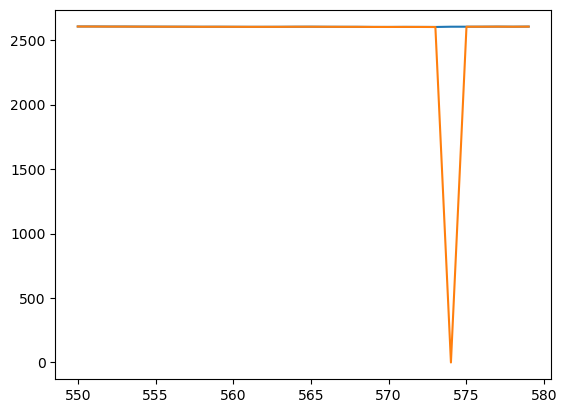

In [90]:
s = 6
plt.plot(backtest.mdc.dfs[s].df.o_ask_px_3[550:580])
plt.plot(backtest.mdc.dfs[s].df.o_bid_px_3[550:580])

In [38]:
backtest.omc.orders = []
backtest.omc.compose_order(0.01, 0.5, True, "BTCUSD_PERP")
print(backtest.omc.orders)
backtest.omc.match_orders(1706094786886000000)

[Order(px=0.01, qt=0.5, side_ask=True, name='BTCUSD_PERP', ts=1705123081886000000, id=0, FoK=False, strat_id=0, exec_time=-1)]


[MatchRes(amnt=21411.75, qt=0.5, comm=10.705875, order=Order(px=0.01, qt=0.0, side_ask=True, name='BTCUSD_PERP', ts=1705123081886000000, id=0, FoK=False, strat_id=0, exec_time=-1), status=<ExecStatus.FILLED: 0>, ts=1705123081866000000)]

In [1]:
import os
import pandas as pd
PREFIX = "./data_1/"

files = os.listdir(PREFIX)
for n in files:
    ds = pd.read_csv(PREFIX + n)
    ds = ds.loc[ds["t_flag"] == 0]
    ds.to_csv(PREFIX + "--" + n)

In [2]:
import os
import pandas as pd

ds = pd.read_csv("./data_1/--BinanceFutC_BNBUSD_PERP_Binance_FutC_PERPETUAL.csv")["timestamp"].

,Unnamed: 0,id,timestamp,o_ts_recv,o_ts_exch,t_flag,t_px,t_qt,o_dep_ask,o_dep_bid,...,o_bid_px_198,o_bid_qt_198,o_ask_px_199,o_ask_qt_199,o_bid_px_199,o_bid_qt_199,o_ask_px_200,o_ask_qt_200,o_bid_px_200,o_bid_qt_200
0,4,4,2024-01-12 17:05:57.433289,2024-01-12 17:05:57.432719,2024-01-12 17:05:57.205,0,0.0,0.0,96,106,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6,6,2024-01-12 17:05:57.981823,2024-01-12 17:05:57.980978,2024-01-12 17:05:57.497,0,0.0,0.0,95,109,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7,7,2024-01-12 17:05:58.388840,2024-01-12 17:05:58.388324,2024-01-12 17:05:57.819,0,0.0,0.0,99,110,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,15,15,2024-01-12 17:05:58.572532,2024-01-12 17:05:58.571715,2024-01-12 17:05:58.074,0,0.0,0.0,94,118,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,19,19,2024-01-12 17:05:59.569874,2024-01-12 17:05:59.569170,2024-01-12 17:05:58.765,0,0.0,0.0,101,122,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121198,143689,143689,2024-01-15 08:38:49.196969,2024-01-15 08:38:49.196172,2024-01-15 08:38:49.051,0,0.0,0.0,142,169,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
121199,143690,143690,2024-01-15 08:38:54.617451,2024-01-15 08:38:54.616537,2024-01-15 08:38:54.466,0,0.0,0.0,140,165,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
121200,143691,143691,2024-01-15 08:38:54.713854,2024-01-15 08:38:54.712930,2024-01-15 08:38:54.560,0,0.0,0.0,138,144,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
121201,143692,143692,2024-01-15 08:38:55.232666,2024-01-15 08:38:55.232053,2024-01-15 08:38:55.090,0,0.0,0.0,140,163,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
backtest.step()
print(backtest.mdc.dfs[0].get_line(3))
print(backtest.mdc.dfs[1].get_line(3))
print(backtest.mdc.get_upded_labels())
print(backtest.mdc.get_all_lines())
print(backtest.omc.match_orders(1702911215551000000))
print(backtest.omc.orders)

In [ ]:
a = [1,2,3,4]
b = a[2]
del(a[2], a[1])
a.reverse()
a

In [ ]:
print(db.move(20))
print(db.ts)
db.get_line(3)